# Статистика в R - первая часть
В R доступны несколько встроенных статистических функций. Рассмотрим их применение на датасете **pirates** из библиотеки **yarrr**.

In [3]:
# install.packages('yarrr')         # для работы с датасетом установите библиотеку 'yarrr'
library(yarrr)

После загрузки можно посмотреть на датасет **pirates**: это таблица с данными по 1000 выжившим пиратам и их характеристикам (пол, возраст и т.д.). Функция **head** покажет первые несколько строк из датасета.

In [4]:
head(pirates)

id,sex,age,height,weight,headband,college,tattoos,tchests,parrots,favorite.pirate,sword.type,eyepatch,sword.time,beard.length,fav.pixar,grogg
1,male,28,173.11,70.5,yes,JSSFP,9,0,0,Jack Sparrow,cutlass,1,0.58,16,"Monsters, Inc.",11
2,male,31,209.25,105.6,yes,JSSFP,9,11,0,Jack Sparrow,cutlass,0,1.11,21,WALL-E,9
3,male,26,169.95,77.1,yes,CCCC,10,10,1,Jack Sparrow,cutlass,1,1.44,19,Inside Out,7
4,female,31,144.29,58.5,no,JSSFP,2,0,2,Jack Sparrow,scimitar,1,36.11,2,Inside Out,9
5,female,41,157.85,58.4,yes,JSSFP,9,6,4,Hook,cutlass,1,0.11,0,Inside Out,14
6,male,26,190.20,85.4,yes,CCCC,7,19,0,Jack Sparrow,cutlass,1,0.59,17,Monsters University,7


Теперь, когда у нас есть данные, можно переходить к статистике: мы будем выполнять тесты на проверку гипотез через встроенные функции **t-test**, **correlation test**, и **chi-square test**. Чем они отличаются вы узнаете далее.

*Примеры применения:*

**t-test**: возраст пиратов в среднем отличается от 30 лет?

In [5]:
t.test(x = pirates$age, 
       mu = 30)


	One Sample t-test

data:  pirates$age
t = -14.427, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 27.00092 27.71908
sample estimates:
mean of x 
    27.36 


**correlation test**: существует ли зависимость между возрастом пиратов и ростом?

In [6]:
cor.test(formula = ~ age + height,
          data = pirates)


	Pearson's product-moment correlation

data:  age and height
t = -6.9204, df = 998, p-value = 8.042e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2723684 -0.1540389
sample estimates:
       cor 
-0.2139885 


**chi-square test**: есть ли зависимость между колледжом и любимым пиратом? 

In [7]:
chisq.test(x = pirates$college,
           y = pirates$favorite.pirate)


	Pearson's Chi-squared test

data:  pirates$college and pirates$favorite.pirate
X-squared = 52.138, df = 5, p-value = 5.054e-10


Прежде чем приступить к рассмотрению этих функций, необходимо понять - *зачем нужны тесты на проверку гипотез и как их составить?* Для этого мы обсудим теоритическую часть.

# Введение в статистический анализ

"Зависит ли успеваемость ученика от успешной сдачи экзамена?", "Есть ли связь между числом царапин у человека и наличием у него домашнего животного?" - ответы на такие вопросы, называемыми *статистическими гипотезами* может дать **статистический анализ**, позволяющий найти корреляцию (связь) между величинами.

Для проверки статистических гипотез необходимо ввести понятия: **нулевая гипотеза** и **альтернативная**. Первая рассматривает ситуацию с *неизменными условиями*, в то время как вторая ей *противопоставляется*.

Предположим, что мы хотим проверить гипотезу: *действительно ли у европейских пиратов больше попугаев, чем у американских?*

**Н0** (нулевая нипотеза): у европейских и американских пиратов **одинаковое** количество попугаев
<br>**Н1** (альтернативная гипотеза): у европейских и американских пиратов **разное** количество попугаев

У 20 пиратов (10 европейцев, 10 американцев) спросили, сколько попугаев у них есть. Результаты опроса представим в виде вектора, а затем перенесем в dataframe:

In [8]:
american.parrots <- c(4, 1, 0, 2, 1, 6, 0, 3, 1, 3)
european.parrots <- c(3, 5, 1, 1, 3, 6, 11, 2, 1, 4)

# не забывайте, что  точка в R не является спец. символом!

In [9]:
parrots.survey <- data.frame("parrots" = c(american.parrots, european.parrots),
                             "group" = rep(c("American", "European"), each = 10),
                             stringsAsFactors = FALSE)

In [10]:
parrots.survey        # вывод полученного dataframe

parrots,group
4,American
1,American
0,American
2,American
1,American
6,American
0,American
3,American
1,American
3,American


Теперь попробуем представить наши данные в виде наглядного статистического графика:

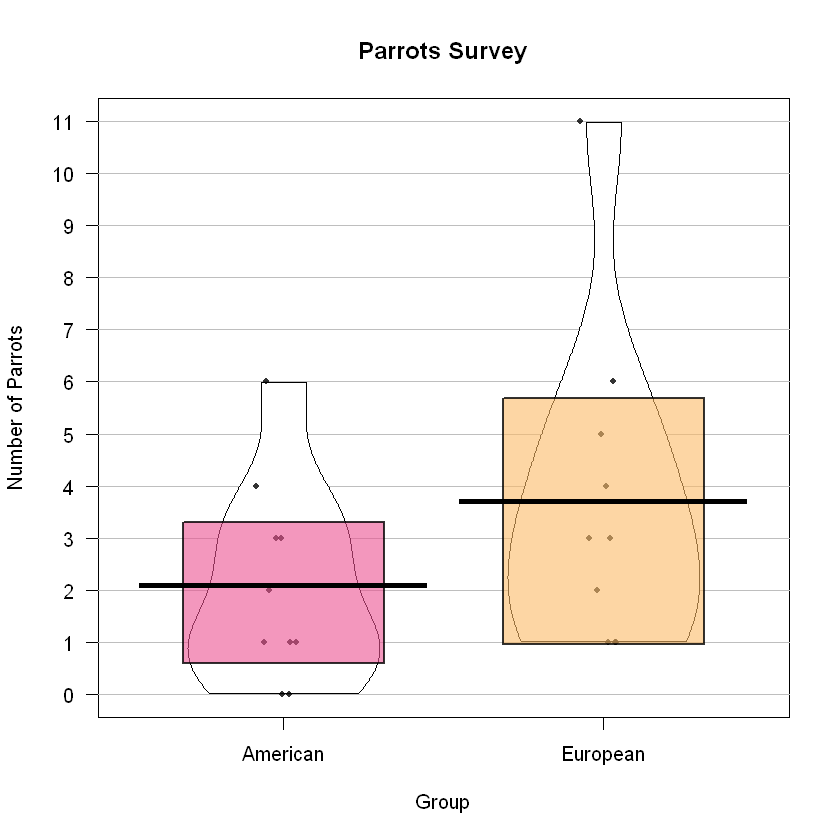

In [11]:
yarrr::pirateplot(parrots ~ group,            # корреляция
                  data = parrots.survey,      # датасет
                  main = "Parrots Survey",    # название графика
                  ylab = "Number of Parrots", # название оси y
                  xlab = "Group",             # название оси x
                  pal = "pony",               # цветовая схема (optional)
                  theme = 2,                  # выбор типа графика
                  point.o = .8,               # непрозрачность точек, ср. линии и проч.
                  cap.beans = TRUE)

Наверняка у вас появился вопрос: а что это за график и как его интерпретировать? Это так называемый **pirate plot** - созданный разработчиками R график, совмещающий три параметра: необработанные (входные) данные, описательную статистику и выходные данные.

Что показано на графике:
- фигуры (похожие на вазы) показывают максимальное и минимальное значения в выборках (верх и низ вазы, соответственно) и плотность распределения
- толстой черной линией указаны медианы выборок
- цветные прямоугольники показывают 50% наблюдений (где верхняя сторона - верхний квартиль, нижняя - нижний квартиль)

<br><i>нижний квартиль показывает значение, ниже которого находится четверть наблюдений
<br><i>верхний квартиль показывает значение, выше которого находится четверть наблюдений

Pirate plot это частный случай стандартного **boxplot** (называемого в статистике "ящик с усами"), вы можете его вывести установив параметр: theme = 4

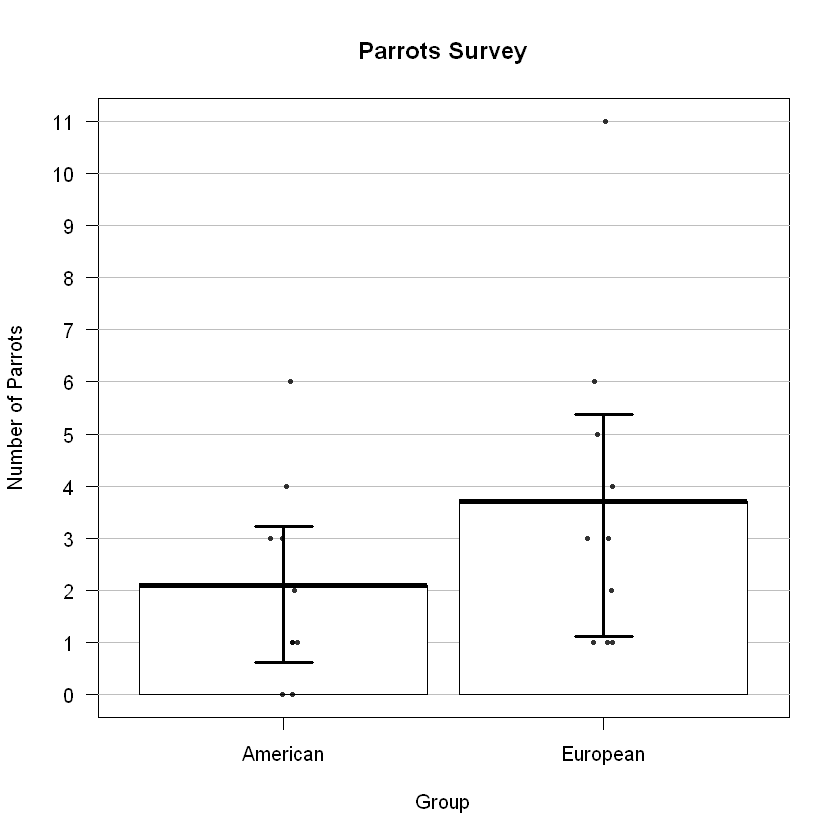

In [12]:
yarrr::pirateplot(parrots ~ group,                  
                  data = parrots.survey,
                  main = "Parrots Survey",
                  ylab = "Number of Parrots",
                  xlab = "Group",
                  pal = "pony", 
                  theme = 4, point.o = .8, cap.beans = TRUE)

Таким способом вы можете строить графическую интерпретацию своих данных, наглядно отображающую основные статистические параметры.

Альтернативой построения такого графика является функция **summary**

In [13]:
summary(american.parrots)
summary(european.parrots)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     1.0     1.5     2.1     3.0     6.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.25    3.00    3.70    4.75   11.00 

Мы научились строить один из статистических графиков, но для полноценных проверок гипотез нужно научиться *оценивать их значимость* и отвергать неподходящие.

# Статистические критерии

Статистический критерий - особое правило, позволяющее принять или отвергнуть статистическую гипотезу. Чтобы его построить, необходимо выбрать правильную функцию (формулу), в зависимости от типа ваших данных (много ли у вас наблюдений, были ли они собраны у одного человека или у группы и т.д.).

Вернемся к нашим гипотезам с попугаями и проверим через **t-test**, именуемый **t-критерием Стьюдента***, верна ли наша альтернативная гипотеза или нет.

<i>* t-критерий стьюдента - статистический метод, который позволяет сравнивать средние значения двух выборок и на основе результатов теста делать заключение о том, различаются ли они друг от друга статистически или нет.

# t.test()

|Параметр|Описание|
|---|---|
|x|Набор данных (вектор), с которыми сравнивается нулевая гипотеза|
|mu|Нулевая гипотеза (некоторое известное значение)|
|alternative|Параметр выбора типа теста: "two.sided", "greater" или “less"|
|subset|Опциональный параметр для выбора нескольких параметров для сравнения|

In [40]:
parrots.test <- t.test(x = american.parrots,       # Смотрим зависимость по количеству попугаев
                       y = european.parrots,
                       alternative = "two.sided") 
parrots.test


	Welch Two Sample t-test

data:  american.parrots and european.parrots
t = -1.3915, df = 15.002, p-value = 0.1844
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.0508849  0.8508849
sample estimates:
mean of x mean of y 
      2.1       3.7 


Для проверки значимости полученных результатов посмотрим на значение **p-value*** (выведем отдельно)
<br>
<br>*<i>p-value это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет. Если он меньше 0,05 - нулевая гипотеза отвергается, а альтернативная признается верной

In [15]:
parrots.test$p.value

[1] 0.1843797

Полученное значение меньше 0,05 => гипотеза Н0 *отклоняется*, а H1 *признается значимой*.

Мы проверили гипотезы на двух выборках: пиратах из Англии и Америки, но t-test можно провести и для одной выборки, наблюдения которой будут сравниваться с *некоторым параметром*, представляющим нулевую гипотезу.

Вспомним про датасет **pirates**, который мы загрузили в самом начале, и проведем t-test для него: посмотрим, отличается ли в среднем вес пиратов от 80 кг.

**Н0**: вес пиратов *не отличается* от 80 кг
<br>**Н1**: вес пиратов *отличается* от 80 кг

In [16]:
weight.ttest <- t.test(x = pirates$weight,  
                       mu = 80)              # значение, с которым сравниваем выборку (нулевая гипотеза)

In [17]:
weight.ttest


	One Sample t-test

data:  pirates$weight
t = -29.962, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 80
95 percent confidence interval:
 69.07292 70.41628
sample estimates:
mean of x 
  69.7446 


p-value гораздо меньше 0,05 => вес в среднем отличается от 80 кг, среднее значение по выборке можно увидеть в последней строке
<br> А что если заменить параметр (нулевую гипотезу) на 69,7? p-value должна показать, что нулевая гипотеза верная

In [20]:
weight.ttest <- t.test(x = pirates$weight,  
                       mu = 69.7) 

In [21]:
weight.ttest


	One Sample t-test

data:  pirates$weight
t = 0.1303, df = 999, p-value = 0.8964
alternative hypothesis: true mean is not equal to 69.7
95 percent confidence interval:
 69.07292 70.41628
sample estimates:
mean of x 
  69.7446 


Как и предполагалось: p-value больше 0,05 => *нулевая гипотеза признается значимой* - вес пиратов в среднем около 70 кг

То что мы сейчас провели называется **тестом с одновыборочным t-критерием** - у нас было *одно* известное значение, с которым мы сравнивали выборку.

Но мы можем сравнивать данные и по *двум* значениям, т.е. **двухвыборочному t-критерию**, всё, что нам понадобится - переменная (вторая выборка), значения которой *варьируются по двум параметрам*.

In [ ]:
# Общий синтаксис (не запускать!)

t.test(formula = y ~ x,    # x - переменная, принимающая 2 значения (укажете больше - получите ошибку)
       data = df)

Проверим гипотезу: зависит ли вес пиратов от возраста, причем рассматривать будем 30 и 40-летних:

In [24]:
weightage.htest <- t.test(formula = weight ~ age,
                          data = pirates,
                          subset = age %in% c(30, 40))  # указание возраста

weightage.htest


	Welch Two Sample t-test

data:  weight by age
t = 0.94943, df = 13.575, p-value = 0.359
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.325927  6.001337
sample estimates:
mean in group 30 mean in group 40 
         69.6377          67.8000 


Выводы по результату сделайте сами.

In [39]:
t.test(formula = parrots ~ eyepatch,      # Проверяем зависимость наличия попугая от повязки на глазу у пиратов-мужчин
       data = pirates,
       subset = sex == "male")


	Welch Two Sample t-test

data:  parrots by eyepatch
t = -1.7634, df = 449.48, p-value = 0.0785
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.95531729  0.05170459
sample estimates:
mean in group 0 mean in group 1 
       2.372093        2.823899 


# cor.test()

Вы также можете провести обычную **корреляцию**: допустим, мы хотим посмотреть зависимость количества татуировок у пиратов от их возраста:

In [82]:
tattoosage <- cor.test(formula = ~ tattoos + age,
                       data = pirates)
tattoosage


	Pearson's product-moment correlation

data:  tattoos and age
t = 0.76541, df = 998, p-value = 0.4442
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03782828  0.08608543
sample estimates:
       cor 
0.02422161 


In [83]:
age.parrots.ctest <- cor.test(x = pirates$age,        # Аналогичные результаты другим способом записи
                              y = pirates$parrots)

# chsq.test()

Еще одно статистическое распределение (тест) - **хи-квадрат**. Показывает есть ли разница в показателях результатов по номинальной шкале (например, пол, цвет глаз, имя и т. д.).

*обратите внимание: функция chsq.test() принимает файлы табличного вида (table())*


In [ ]:
# Общий синтаксис (не запускать!)
chisq.test(x = table(x))

Хи-квадрат тесты также могут быть *одно-* и *двухвыборочными*. Проведем **одновыборочный хи-квадрат тест**, чтобы узнать - одинаково ли распространены колледжи пиратов?

In [84]:
table(pirates$college)   # Получаем таблицу из столбца


 CCCC JSSFP 
  658   342 

По результатам: в колледж CCCC ходило явно больше пиратов => результаты распространены неодинаково => сам параметр хи-квадрат должен быть *большим*, а p-value должна быть *маленькой*.

In [86]:
college.cstest <- chisq.test(x = table(pirates$college))
college.cstest


	Chi-squared test for given probabilities

data:  table(pirates$college)
X-squared = 99.856, df = 1, p-value < 2.2e-16


*Результаты подтвердились.*

Если вы хотите увидеть, зависит ли частота одной номинальной переменной от второй номинальной переменной, вы должны провести **двухвыборочный тест хи-квадрат**. Например, мы можем узнать, есть ли связь между колледжем, в который пошел пират, и носит ли он / она повязку на глазу.

In [87]:
table(pirates$eyepatch,  # Создание таблицы из двух столбиков
      pirates$college)

   
    CCCC JSSFP
  0  225   117
  1  433   225

In [88]:
colpatch.cstest <- chisq.test(x = table(pirates$college,        # Проверка теста
                                        pirates$eyepatch))

colpatch.cstest


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(pirates$college, pirates$eyepatch)
X-squared = 0, df = 1, p-value = 1


p-value = 1 сообщает о плохих результатах: колледж и повязка на глазу никак не связаны между собой.   

# Функция APA

Для более краткого вывода результов статистических тестов можно воспользоваться функцией APA:

In [89]:
test.result <- t.test(age ~ headband,      # Пример для t-test
                      data = pirates)
yarrr::apa(test.result)

[1] "mean difference = -0.22, t(135.47) = 0.35, p = 0.73 (2-tailed)"

In [90]:
age.parrots.ctest <- cor.test(formula = ~ age + parrots,      # Пример для корреляции
                              data = pirates)
yarrr::apa(age.parrots.ctest)

[1] "r = 0.19, t(998) = 6.13, p < 0.01 (2-tailed)"

*Продолжение применения статистического анализа в R ищете в файле **R statistics II**!*